In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
from glob import glob 
from pathlib import Path 
import numpy as np 
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

from gptchem.representation import smiles_to_canoncial

%matplotlib inline

In [3]:
all_res = glob("results_balanced/*.pkl")

In [4]:
all_cm_res = []
all_confident_res = []

for res in all_res:
    res = load_pickle(res)
    cm_all = res["cm_all"]
    cm_confident = res["cm_confident"]

    cm_all["num_classes"] = res["num_classes"]
    cm_all["num_train_points"] = res["num_train_points"]
    cm_all["representation"] = ", ".join(res["representation"])
    cm_all['num_reps'] = len(res["representation"])

    cm_confident["num_classes"] = res["num_classes"]
    cm_confident["num_train_points"] = res["num_train_points"]
    cm_confident["representation"] = ", ".join(res["representation"])
    cm_confident["frac_confident"] = sum(res["confident"]) / res["num_test_points"]
    cm_confident['num_reps'] = len(res["representation"])

    all_cm_res.append(cm_all)
    all_confident_res.append(cm_confident)

In [5]:
all_cm_res = pd.DataFrame(all_cm_res)
all_confident_res = pd.DataFrame(all_confident_res)

In [6]:
all_cm_res_grouped = (
    all_cm_res[
        [
            "num_classes",
            "representation",
            "num_train_points",
            "accuracy",
            "kappa",
            "f1_macro",
            "f1_micro",
            "num_reps"
        ]
    ]
    .groupby(["num_classes", "representation", "num_train_points"])
    .agg(["mean", "std", sem])
)
all_confident_res_grouped = (
    all_confident_res[
        [
            "num_classes",
            "representation",
            "num_train_points",
            "frac_confident",
            "accuracy",
            "kappa",
            "f1_macro",
            "f1_micro",
            "num_reps"
        ]
    ]
    .groupby(["num_classes", "representation", "num_train_points"])
    .agg(["mean", "std", sem])
)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [7]:
all_cm_res_grouped

accuracy  \
                                                                                     mean   
num_classes representation                                     num_train_points             
2           selfies_x, canonical                               10                0.800000   
                                                               20                0.770000   
                                                               50                0.720000   
                                                               100               0.820000   
                                                               200               0.826667   
            selfies_x, deepsmiles, canonical                   10                0.810000   
                                                               20                0.770000   
                                                               50                0.890000   
                                                               100               0.820000   
            selfies_x, deepsmiles, canonical, inchi_x, tucan   10                0.840000   
                                                               20                0.790000   
                                                               50                0.850000   
                                                               100               0.840000   
                                                               200               0.890000   
            selfies_x, deepsmiles, canonical, inchi_x, tuca... 10                0.710000   
                                                               20                0.730000   
                                                               50                0.750000   
                                                               100               0.860000   
                                                               200               0.769231   
5           selfies_x, canonical                               10                0.280000   
                                                               20                0.310000   
                                                               50                0.420000   
                                                               100               0.560000   
                                                               200               0.530000   
            selfies_x, deepsmiles, canonical                   10                0.310000   
                                                               20                0.390000   
                                                               50                0.480000   
                                                               100               0.550000   
                                                               200               0.580000   
            selfies_x, deepsmiles, canonical, inchi_x, tucan   10                0.335000   
                                                               20                0.460000   
                                                               50                0.500000   
                                                               100               0.610000   
                                                               200               0.560000   
            selfies_x, deepsmiles, canonical, inchi_x, tuca... 20                0.380000   
                                                               50                0.450000   
                                                               100               0.540000   
                                                               200               0.692308   

                                                                                           \
                                                                                      std   
num_classes representation                                     num_train_points  

In [8]:
all_confident_res_grouped

frac_confident  \
                                                                                          mean   
num_classes representation                                     num_train_points                  
2           selfies_x, canonical                               10                     0.680000   
                                                               20                     0.780000   
                                                               50                     0.670000   
                                                               100                    0.835000   
                                                               200                    0.863333   
            selfies_x, deepsmiles, canonical                   10                     0.590000   
                                                               20                     0.740000   
                                                               50                     0.650000   
                                                               100                    0.765000   
            selfies_x, deepsmiles, canonical, inchi_x, tucan   10                     0.520000   
                                                               20                     0.680000   
                                                               50                     0.450000   
                                                               100                    0.660000   
                                                               200                    0.680000   
            selfies_x, deepsmiles, canonical, inchi_x, tuca... 10                     0.280000   
                                                               20                     0.410000   
                                                               50                     0.550000   
                                                               100                    0.560000   
                                                               200                    0.692308   
5           selfies_x, canonical                               10                     0.420000   
                                                               20                     0.220000   
                                                               50                     0.480000   
                                                               100                    0.590000   
                                                               200                    0.640000   
            selfies_x, deepsmiles, canonical                   10                     0.155000   
                                                               20                     0.215000   
                                                               50                     0.270000   
                                                               100                    0.500000   
                                                               200                    0.500000   
            selfies_x, deepsmiles, canonical, inchi_x, tucan   10                     0.035000   
                                                               20                     0.070000   
                                                               50                     0.150000   
                                                               100                    0.300000   
                                                               200                    0.330000   
            selfies_x, deepsmiles, canonical, inchi_x, tuca... 20                     0.130000   
                                                               50                     0.200000   
                                                               100                    0.250000   
                                                               200                    0.230769   

                                                             

In [9]:
photoswitch_results = pd.read_pickle('../../../03_classification/photoswitch/results.pkl')

KeyError: 'f1_macro'

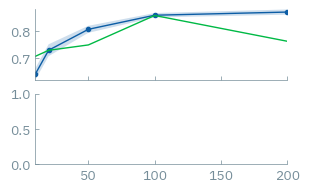

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex=True)

metric = 'f1_macro'

ax[0].plot(photoswitch_results.loc[2, 'SMILES'].index, photoswitch_results.loc[2, 'SMILES'][metric]['mean'], label='SMILES', marker='o')
ax[0].fill_between(photoswitch_results.loc[2, 'SMILES'].index, 
                   photoswitch_results.loc[2, 'SMILES'][metric]['mean'] - photoswitch_results.loc[2, 'SMILES'][metric]['sem'], photoswitch_results.loc[2, 'SMILES'][metric]['mean'] + photoswitch_results.loc[2, 'SMILES'][metric]['sem'], alpha=0.2)


for reps in all_cm_res['representation'].unique(): 
    subset = all_cm_res_grouped.loc[2, reps]
    subset_confident = all_confident_res_grouped.loc[2, reps]
    ax[0].plot(subset.index, subset[metric]['mean'], label=reps)
    ax[0].fill_between(subset.index, subset[metric]['mean'] - subset[metric]['sem'], subset[metric]['mean'] + subset[metric]['sem'], alpha=0.2)

    ax[0].plot(subset_confident.index, subset_confident[metric]['mean'], label=reps + " (confident)")
    ax[0].fill_between(subset_confident.index, subset_confident[metric]['mean'] - subset_confident[metric]['sem'], subset_confident[metric]['mean'] + subset_confident[metric]['sem'], alpha=0.2)

    


matplotx.line_labels(ax[0])


ylabel_top(r'F$_1$ macro binary', ax[0])
ylabel_top(r'F$_1$ macro 5-class', ax[1])

plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

ax[-1].set_xlabel('number of training points')

fig.savefig('multirep_photoswitch_lc.pdf', bbox_inches='tight')